In [80]:
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt

# using random seed of 13 in the whole experiment
np.random.seed(13)

### Loading the dataset

In [81]:
runs = np.load('./../datasets/runs.npy')
runs = runs.reshape(-1, 1)
num_balls = runs.shape[0]
print('Total runs      : ',np.sum(runs))
print('Number of balls : ',num_balls)
print('Run rate        : ',np.round(np.sum(runs)/(num_balls/6),2))
print('Strike Rate     : ',np.round(np.sum(runs)*100/num_balls,2))

Total runs      :  86588
Number of balls :  30000
Run rate        :  17.32
Strike Rate     :  288.63


---
    - Notations and assumptions

    - States and Observations
        - Hidden states : Rohit [0] or Virat [1]
        - Observed states : 0,1,2,3,4,5,6
---
    - State Transition Matrix A - roughly 30% chance that state changes

        - transition_prob[0][0] = P(s_n=Rohit | s_(n-1)=Rohit)
        - transition_prob[0][1] = P(s_n=Virat | s_(n-1)=Rohit)
        - transition_prob[1][0] = P(s_n=Rohit | s_(n-1)=Virat)
        - transition_prob[1][1] = P(s_n=Virat | s_(n-1)=Virat)
---
    - States
        - B[0] -> Rohit
        - B[1] -> Virat


In [82]:
runs_train = runs[:num_balls//2]
runs_val = runs[num_balls//2:]


# start_prob = np.array([0.5,0.5])
transition_prob = np.array([np.random.dirichlet([0.7, 0.3]),np.random.dirichlet([0.3, 0.7])])
emission_prob = np.array([[0.1, 0.1, 0.05, 0.05, 0.4, 0.0, 0.3], [0.1, 0.3, 0.2, 0.1, 0.2, 0.0, 0.1] ])

model = hmm.CategoricalHMM(n_components=2,init_params='s',n_iter=1500)
# model.startprob_ = start_prob
model.transmat_ = transition_prob
model.emissionprob_ = emission_prob
model.fit(runs_train)


CategoricalHMM(init_params='s', n_components=2, n_features=7, n_iter=1500,
               random_state=RandomState(MT19937) at 0x7F1D845F9840)

In [83]:

print("Initial state probabilities : \n")
print('Rohit : ',model.startprob_[0])
print('Virat : ',model.startprob_[1])


Initial state probabilities : 

Rohit :  7.313117512838394e-13
Virat :  0.9999999999992686


In [84]:
print("Initial state probabilities : \n")
print('Rohit : ',np.round(model.emissionprob_[0],2))
print('Virat : ',np.round(model.emissionprob_[1],2))
print('Runs  :  [  0    1    2    3    4    5    6]')

Initial state probabilities : 

Rohit :  [0.09 0.08 0.08 0.05 0.38 0.   0.32]
Virat :  [0.15 0.27 0.25 0.05 0.17 0.   0.12]
Runs  :  [  0    1    2    3    4    5    6]


In [85]:
print("Transition Matrix : ", end="\n")
print(model.transmat_[0])
print(model.transmat_[1])



Transition Matrix : 
[0.63951688 0.36048312]
[0.23663888 0.76336112]


Most likely sequence of hidden states : 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 

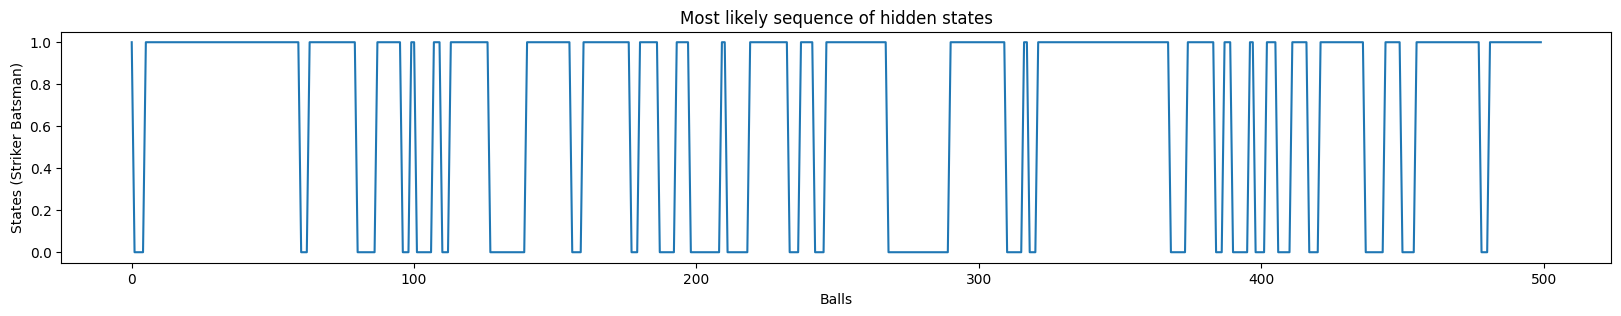

In [86]:
predicted_states = model.predict(runs)
print("Most likely sequence of hidden states : ", end="")

for i in predicted_states:
    print(i, end=" ")
    
N = 500
plt.figure(figsize=(20,3))
plt.plot(predicted_states[:N])
plt.xlabel('Balls')
plt.ylabel('States (Striker Batsman)')
plt.title("Most likely sequence of hidden states")
plt.show()


In [87]:
first_ball_player = 'Rohit' if predicted_states[0]==1 else 'Virat'
last_ball_player = 'Rohit' if predicted_states[-1]==1 else 'Virat'

print('According to predictions...')
print('First Ball Player : ',first_ball_player)
print('Last Ball player  : ',last_ball_player)


According to predictions...
First Ball Player :  Rohit
Last Ball player  :  Rohit
